# Boosting Algorithms

ML Lab 10

### Random Forest, XG Boost, Ada Boost
---



Vemula Ananya 

In [7]:
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('TitanicDataset.csv')

# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load the trained ANN model
model = load_model('100TSMVA.h5')
# Get predictions from the ANN
y_train_pred_prob = model.predict(X_train)
y_train_pred = (y_train_pred_prob > 0.5).astype(int).flatten()

# 🎯 Train AdaBoost
ada_boost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ada_boost.fit(X_train, y_train)

# 🎯 Train XGBoost
xgb_boost = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_boost.fit(X_train, y_train)

# 🎯 Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate XGBoost
y_pred_xgb = xgb_boost.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {xgb_acc:.4f}")

# Evaluate AdaBoost
y_pred_ada = ada_boost.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Test Accuracy: {ada_acc:.4f}")

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_acc:.4f}")

# Save Models
joblib.dump(xgb_boost, "boosted_xgb_model.pkl")
joblib.dump(ada_boost, "boosted_ada_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
print("Models saved as boosted_xgb_model.pkl, boosted_ada_model.pkl, and random_forest_model.pkl")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
XGBoost Test Accuracy: 0.8101
AdaBoost Test Accuracy: 0.7989
Random Forest Test Accuracy: 0.8156
Models saved as boosted_xgb_model.pkl, boosted_ada_model.pkl, and random_forest_model.pkl


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


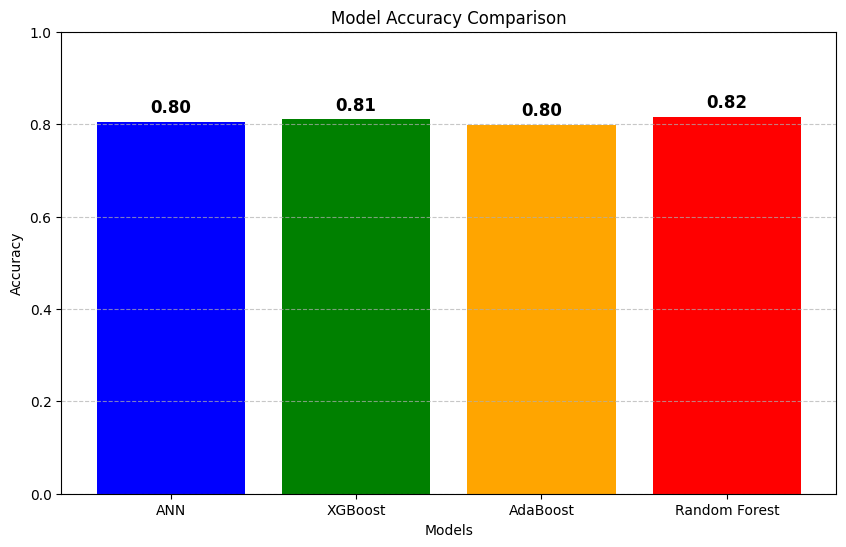

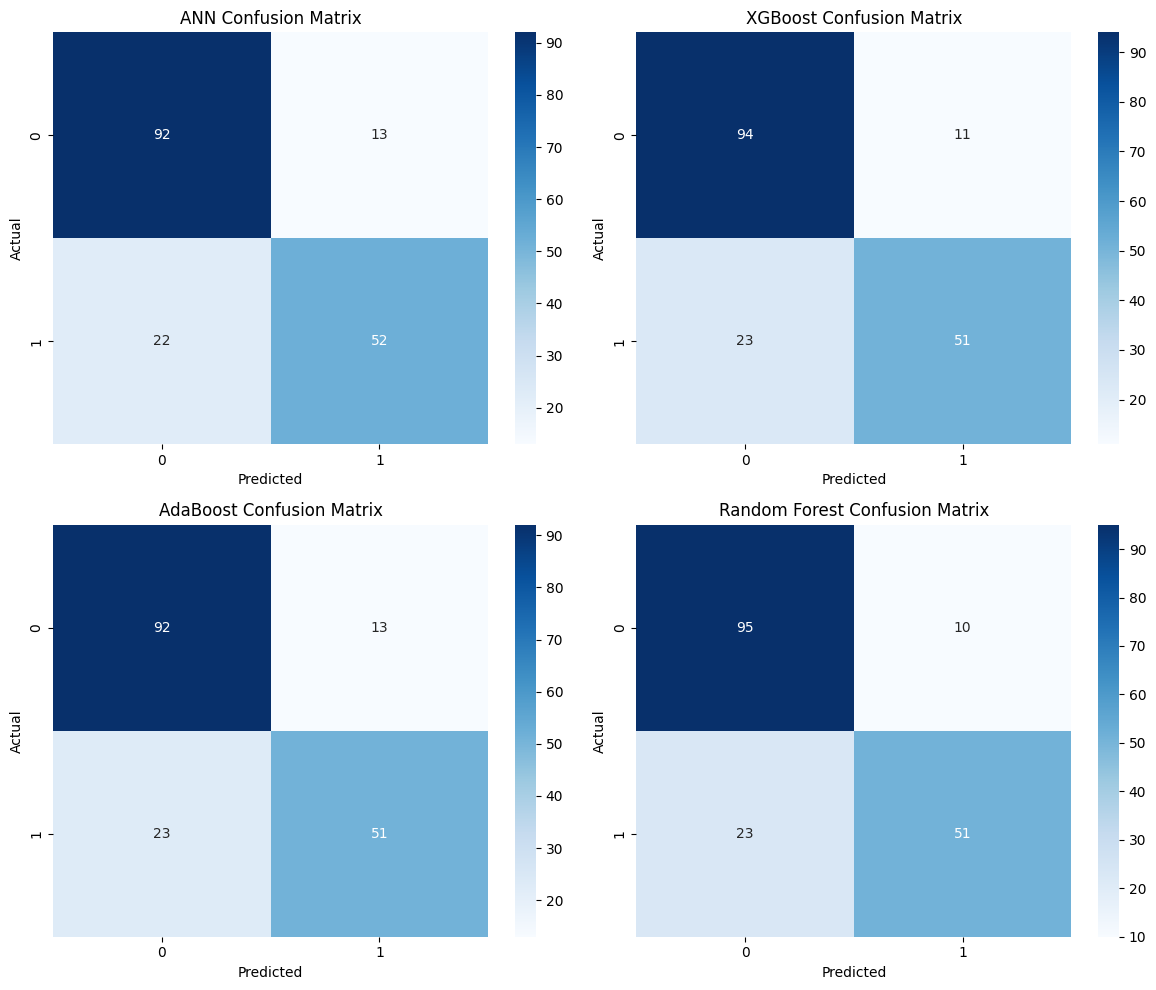

In [8]:
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
data = pd.read_csv('TitanicDataset.csv')

# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load the trained ANN model
ann_model = load_model('100TSMVA.h5')
# Get ANN predictions
y_pred_ann_prob = ann_model.predict(X_test)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int).flatten()
ann_acc = accuracy_score(y_test, y_pred_ann)

# Load Boosted Models
xgb_boost = joblib.load("boosted_xgb_model.pkl")
ada_boost = joblib.load("boosted_ada_model.pkl")
rf_model = joblib.load("random_forest_model.pkl")

# Predictions for each model
y_pred_xgb = xgb_boost.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

y_pred_ada = ada_boost.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred_ada)

y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# 🎯 Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
models = ["ANN", "XGBoost", "AdaBoost", "Random Forest"]
accuracies = [ann_acc, xgb_acc, ada_acc, rf_acc]
colors = ["blue", "green", "orange", "red"]

plt.bar(models, accuracies, color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha="center", fontsize=12, fontweight="bold")

plt.show()

# 🎯 Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models_preds = {"ANN": y_pred_ann, "XGBoost": y_pred_xgb, "AdaBoost": y_pred_ada, "Random Forest": y_pred_rf}
model_names = list(models_preds.keys())

for idx, (model_name, y_pred) in enumerate(models_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx // 2, idx % 2])
    axes[idx // 2, idx % 2].set_title(f"{model_name} Confusion Matrix")
    axes[idx // 2, idx % 2].set_xlabel("Predicted")
    axes[idx // 2, idx % 2].set_ylabel("Actual")

plt.tight_layout()
plt.show()
